## Inicialización

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import sympy as sp
np.seterr(all='ignore')
import skdsp.signal.discrete as ds
plt.rcParams['text.usetex'] = True

In [2]:
npts = 32
sgKeys = ['delta', 'escalón', 'rampa', 'pulso rectangular', 'pulso triangular']
sgButtons = widgets.ToggleButtons(
    options=list(zip(sgKeys, range(0, len(sgKeys)))),
    description='señal:',
    disabled=False,
    button_style='info'
)
opKeys = ['retardo', 'reflexión y retardo', 'retardo y reflexión']
opButtons = widgets.ToggleButtons(
    options=list(zip(opKeys, range(0, len(opKeys)))),
    description='operación:',
    disabled=False,
    button_style='success'
)
opHbox = widgets.HBox([opButtons])
delSlider = widgets.IntSlider(min=-(npts-1), max=(npts-1), description='retardo:')
widthSlider = widgets.IntSlider(min=0, max=(npts-1), description='anchura:')

## Señales Básicas I

<IPython.core.display.Javascript object>


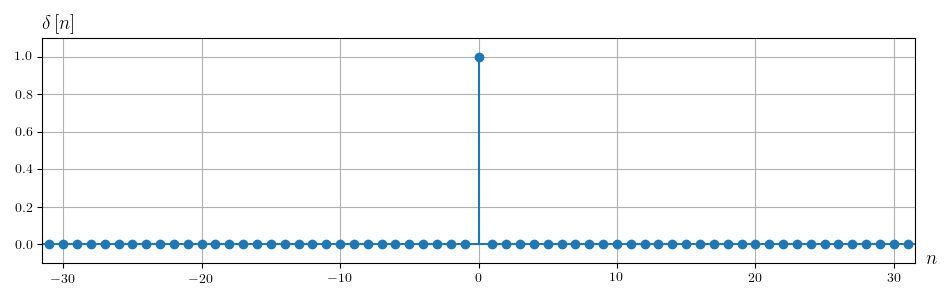

interactive(children=(ToggleButtons(button_style='info', description='señal:', options=(('delta', 0), ('escalón', 1), ('rampa', 2), ('pulso rectangular', 3), ('pulso triangular', 4)), value=0), ToggleButtons(button_style='success', description='operación:', options=(('retardo', 0), ('reflexión y retardo', 1), ('retardo y reflexión', 2)), value=0), IntSlider(value=0, description='retardo:', max=31, min=-31), IntSlider(value=0, description='anchura:', max=31), Output()), _dom_classes=('widget-interact',))

In [3]:
# señales básicas 1
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
plt.axis([-npts+0.5, npts-0.5, -0.1, 1.1])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)
n = ds.n
def s1(sg=0, fd=0, delay=0, width=16):
    widthSlider.disabled = (sg < 3)
    if sg == 0:
        s = ds.Delta(n)
    elif sg == 1:
        s = ds.Step(n)
    elif sg == 2:
        s = ds.Ramp(n)
    elif sg == 3:
        s = ds.RectPulse(n, width)
        widthSlider.min = 0
    elif sg == 4:
        if width == 0:
            width = 1
        s = ds.TriangPulse(n, width)
        widthSlider.min = 1
    if fd == 0:
        s = s.delay(delay)
    elif fd == 1:
        s = s.flip().delay(delay)
    elif fd == 2:
        s = s.delay(delay).flip()
    ys = s[ns]
    pl[0].set_ydata(ys)
    for k in range(len(ns)):
        pl[1][k].set_ydata([0, ys[k]])
    min_ = min(0, np.min(ys))
    max_ = max(np.max(ys), 1)
    range_ = (max_ - min_)*0.1
    plt.ylim([min_-range_, max_+range_])
    plt.title(sp.latex(s, mode='inline'), loc='left', size=14)
widgets.interact(s1, sg=sgButtons, fd=opButtons, delay=delSlider, width=widthSlider);

## Señales Básicas II

In [4]:
npts = 32
sgKeys = ['sinusoide']
sgButtons = widgets.ToggleButtons(
    options=list(zip(sgKeys, range(0, len(sgKeys)))),
    description='señal:',
    disabled=False,
    button_style='info'
)
opKeys = ['retardo', 'reflexión y retardo', 'retardo y reflexión']
opButtons = widgets.ToggleButtons(
    options=list(zip(opKeys, range(0, len(opKeys)))),
    description='operación:',
    disabled=False,
    button_style='success'
)
opHbox = widgets.HBox([opButtons])
delSlider = widgets.IntSlider(min=-(npts-1), max=(npts-1), description='retardo:')
ampSlider = widgets.FloatSlider(min=-1, max=1, description='amplitud:')
freqSlider = widgets.FloatSlider(min=-1, max=1, step=0.01, description=r'\(\omega/\pi\):')
phaseSlider = widgets.FloatSlider(min=-1, max=1, step=0.01, description=r'\(\phi/\pi\):')
envCheck = widgets.Checkbox(value=False, description='envolvente:')
slHBox = widgets.HBox([envCheck, ampSlider, freqSlider, phaseSlider])

<IPython.core.display.Javascript object>


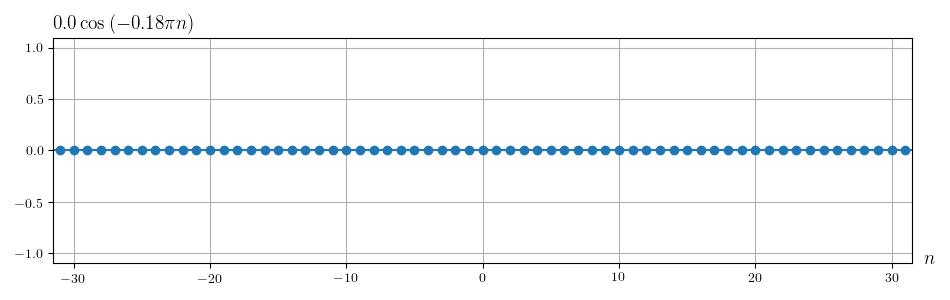

VBox(children=(interactive(children=(ToggleButtons(button_style='info', description='señal:', options=(('sinusoide', 0),), value=0), ToggleButtons(button_style='success', description='operación:', options=(('retardo', 0), ('reflexión y retardo', 1), ('retardo y reflexión', 2)), value=0), Output()), _dom_classes=('widget-interact',)), IntSlider(value=0, description='retardo:', max=31, min=-31), HBox(children=(Checkbox(value=False, description='envolvente:'), FloatSlider(value=0.0, description='amplitud:', max=1.0, min=-1.0), FloatSlider(value=0.0, description='\\(\\omega/\\pi\\):', max=1.0, min=-1.0, step=0.01), FloatSlider(value=0.0, description='\\(\\phi/\\pi\\):', max=1.0, min=-1.0, step=0.01)))))

$0.0 \cos\left( - 0.02 \pi n \right)$
$0.0 \cos\left( 0.55 \pi n \right)$
$0.0 \cos\left( 0.7 \pi n \right)$
$0.0 \cos\left( 0.61 \pi n \right)$
$0.0 \cos\left( 0.51 \pi n \right)$
$0.0 \cos\left( 0.48 \pi n \right)$
$0.0 \cos\left( 0.42 \pi n \right)$
$0.0 \cos\left( 0.2 \pi n \right)$
$0.0 \cos\left( 0.17 \pi n \right)$
$0.0 \cos\left( 0.14 \pi n \right)$
$0.0 \cos\left( 0.11 \pi n \right)$
$0.0 \cos\left( 0.08 \pi n \right)$
$0.0 \cos\left( 0.04 \pi n \right)$
$0.0 \cos\left( 0.01 \pi n \right)$
$0.0 \cos\left( - 0.02 \pi n \right)$
$0.0 \cos\left( - 0.08 \pi n \right)$
$0.0 \cos\left( - 0.11 \pi n \right)$
$0.0 \cos\left( - 0.18 \pi n \right)$


In [5]:
# señales básicas 2
ns = np.arange(-npts, npts+1)
plt.figure(figsize=(9.5, 3), tight_layout=True)
pl = plt.stem(ns, np.zeros(2*npts+1), linefmt='C0-', basefmt='C0-', markerfmt='oC0')
ne = np.arange(-npts-1, npts+1, 0.01)
ple = plt.plot(ne, np.zeros_like(ne), 'C0', lw=1)
ple[0].set_visible(False)
plt.axis([-npts+0.5, npts-0.5, -1.1, 1.1])
plt.grid(True)
plt.xlabel(r'$n$', size=14, position=(1.02, 0), labelpad=-25)
n = ds.n
def s2(sg=0, fd=0):
    if sg == 0:
        s = ds.Sinusoid(n, ampSlider.value, sp.S.Pi*freqSlider.value, sp.S.Pi*phaseSlider.value)
    delay = delSlider.value
    if fd == 0:
        s = s.delay(delay)
    elif fd == 1:
        s = s.flip().delay(delay)
    elif fd == 2:
        s = s.delay(delay).flip()
    ys = s[ns]
    pl[0].set_ydata(ys)
    for k in range(len(ns)):
        pl[1][k].set_ydata([0, ys[k]])
    ple[0].set_visible(envCheck.value)
    if envCheck.value:
        ye = s.eval(ne, True)
        ple[0].set_ydata(ye)

    plt.title(sp.latex(s, mode='inline'), loc='left', size=14)
    
def s2change(change):
    s2()

for w in slHBox.children:
    w.unobserve_all()
    w.observe(s2change, names='value')
delSlider.unobserve_all()
delSlider.observe(s2change, names='value')
ws = widgets.interactive(s2, sg=sgButtons, fd=opButtons);
display(widgets.VBox([ws, delSlider, slHBox]))